In [20]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

In [8]:
#loading audio files
dog_file = "dog.wav"
gunshot_file = "gunshot.wav"

ipd.Audio(dog_file)

In [9]:
ipd.Audio(gunshot_file)

In [15]:
dog, sr = librosa.load(dog_file)
gun, _ = librosa.load(gunshot_file)

print("Number of samples for dog signal: ", dog.size)

Number of samples for dog signal:  88640


In [16]:
sample_duration = 1/sr;
print("Duration of one sample is: ", sample_duration)

Duration of one sample is:  4.5351473922902495e-05


In [19]:
#duration of audio signal in sec
duration = sample_duration * len(dog)
print(f'duration of dog signal is: {duration:.2f}')

duration of dog signal is: 4.02


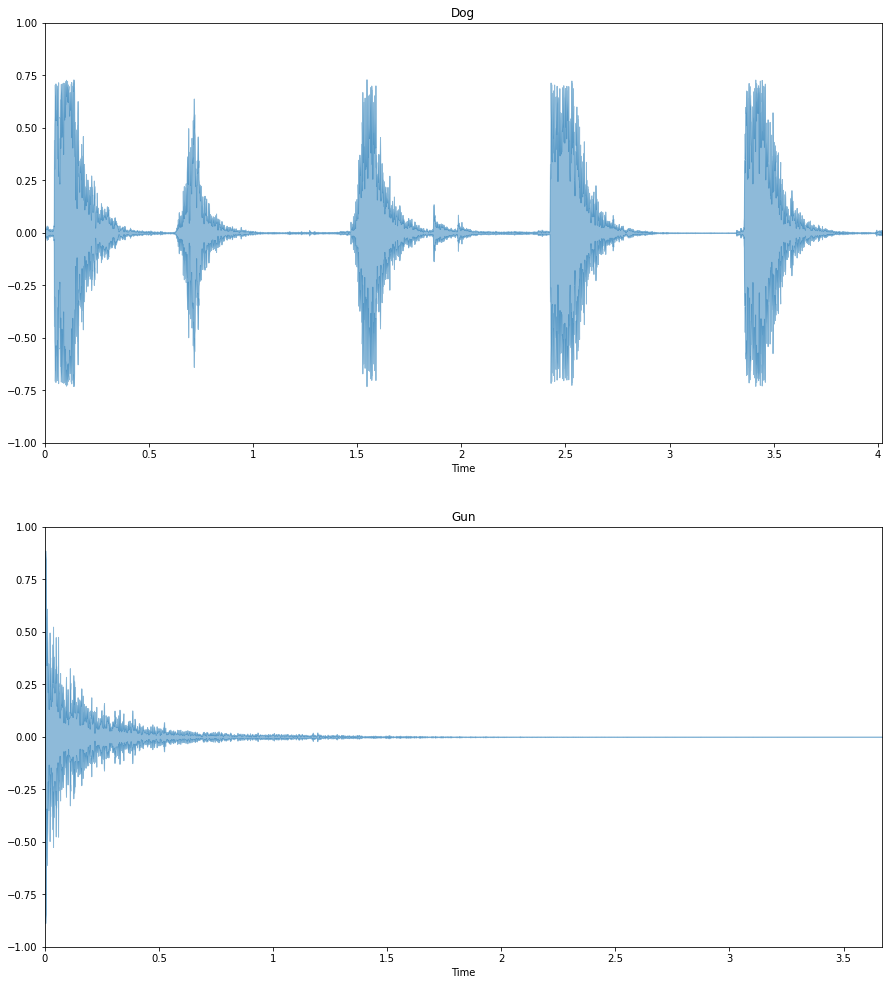

In [21]:
plt.figure(figsize=(15, 17))

plt.subplot(2, 1, 1)
librosa.display.waveplot(dog, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Dog")

plt.subplot(2, 1, 2)
librosa.display.waveplot(gun, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Gun")

plt.show()

## Amplitude Envelope

In [28]:
FRAME_SIZE = 512
HOP_LENGTH = 256

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)    

In [29]:
# number of frames in amplitude envelope
ae_dog = amplitude_envelope(dog, FRAME_SIZE, HOP_LENGTH)
ae_gun = amplitude_envelope(gun, FRAME_SIZE, HOP_LENGTH)
len(ae_dog)

347

In [34]:
frames = range(len(ae_dog))
t_dog = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
frames = range(len(ae_gun))
t_gun = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

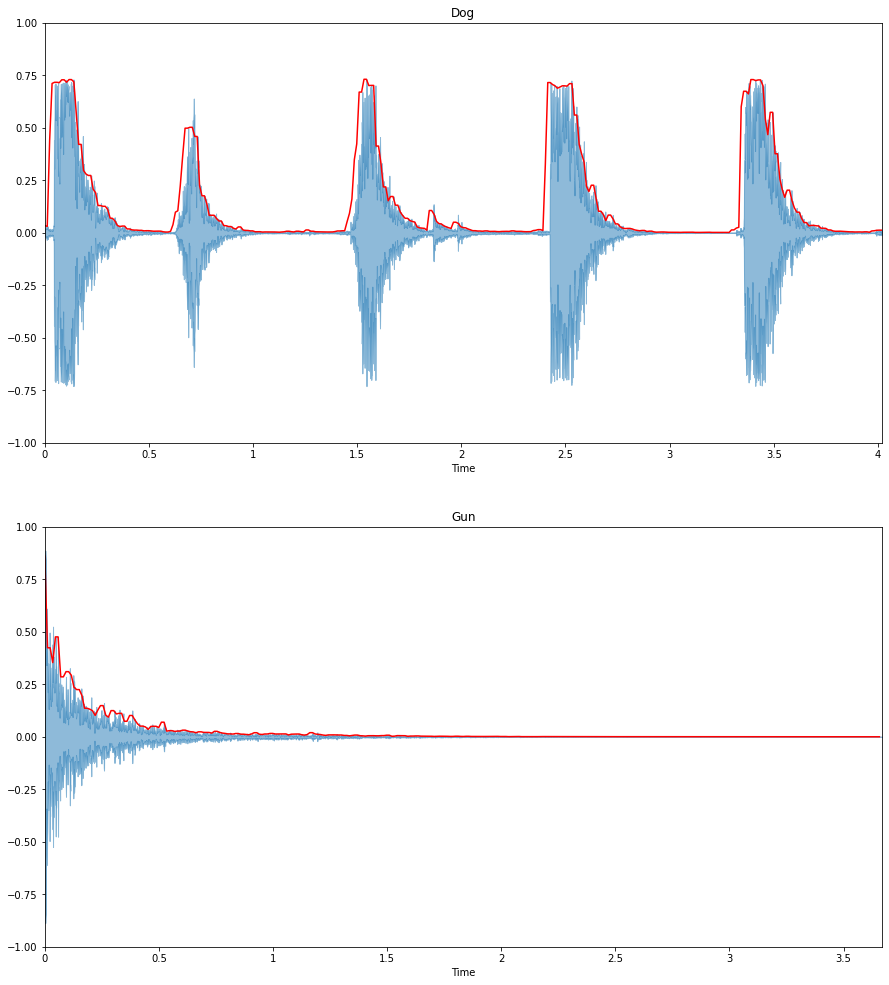

In [35]:
# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(2, 1, 1)
librosa.display.waveplot(dog, alpha=0.5)
plt.plot(t_dog, ae_dog, color="r")
plt.ylim((-1, 1))
plt.title("Dog")

plt.subplot(2, 1, 2)
librosa.display.waveplot(gun, alpha=0.5)
plt.plot(t_gun, ae_gun, color="r")
plt.ylim((-1, 1))
plt.title("Gun")

plt.show()

## Root-mean-squared energy with Librosa

In [36]:
rms_dog = librosa.feature.rms(dog, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_gun = librosa.feature.rms(gun, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
# rms is graphed in red

frames = range(len(rms_dog))
t_dog = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
frames = range(len(rms_gun))
t_gun = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 17))

ax = plt.subplot(2, 1, 1)
librosa.display.waveplot(dog, alpha=0.5)
plt.plot(t_dog, rms_dog, color="r")
plt.ylim((-1, 1))
plt.title("Dog")

plt.subplot(2, 1, 2)
librosa.display.waveplot(gun, alpha=0.5)
plt.plot(t_gun, rms_gun, color="r")
plt.ylim((-1, 1))
plt.title("Gun")

plt.show()

## RMSE from scratch

In [39]:
def rmse(signal, frame_size, hop_length):
    rmse = []
    
    # calculate rmse for each frame
    for i in range(0, len(signal), hop_length): 
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)  

In [40]:
rms_dog1 = rmse(dog, FRAME_SIZE, HOP_LENGTH)
rms_gun1 = rmse(gun, FRAME_SIZE, HOP_LENGTH)

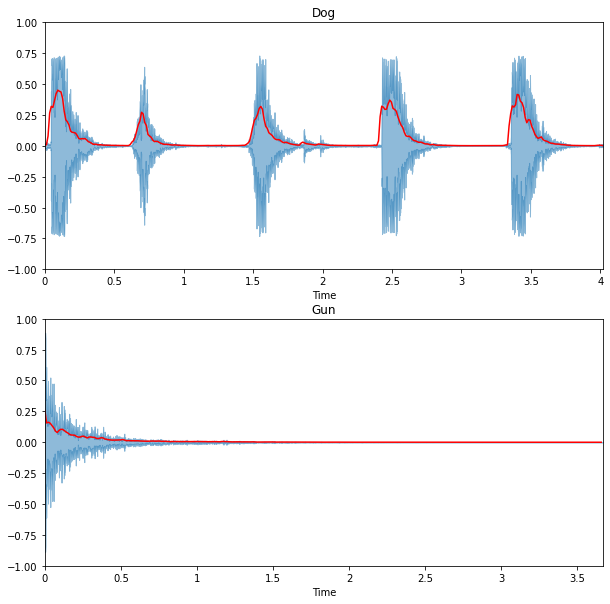

In [46]:
# amplitude envelope is graphed in red

frames = range(len(rms_dog1))
t_dog = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
frames = range(len(rms_gun1))
t_gun = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(10, 10))

ax = plt.subplot(2, 1, 1)
librosa.display.waveplot(dog, alpha=0.5)
plt.plot(t_dog, rms_dog1, color="r")
plt.ylim((-1, 1))
plt.title("Dog")

plt.subplot(2, 1, 2)
librosa.display.waveplot(gun, alpha=0.5)
plt.plot(t_gun, rms_gun1, color="r")
plt.ylim((-1, 1))
plt.title("Gun")

plt.show()

## Zero-crossing rate with Librosa

In [47]:
zcr_dog = librosa.feature.zero_crossing_rate(dog, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_gun = librosa.feature.zero_crossing_rate(gun, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

## Visualise zero-crossing rate with Librosa

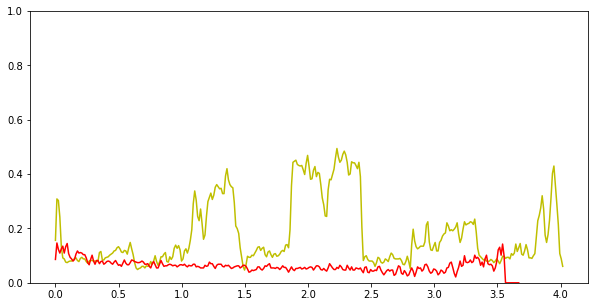

In [52]:
frames = range(len(rms_dog))
t_dog = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
frames = range(len(rms_gun))
t_gun = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(10, 5))

plt.plot(t_dog, zcr_dog, color="y")
plt.plot(t_gun, zcr_gun, color="r")
plt.ylim(0, 1)
plt.show()